In [1]:
import pandas as pd

# Load the dataset
file_path = r'C:\Users\devia\Downloads\health care diabetes (2).csv'
data = pd.read_csv(file_path)

# Display the first few rows and summary statistics to understand the dataset
data.head(), data.describe()


(   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0            6      148             72             35        0  33.6   
 1            1       85             66             29        0  26.6   
 2            8      183             64              0        0  23.3   
 3            1       89             66             23       94  28.1   
 4            0      137             40             35      168  43.1   
 
    DiabetesPedigreeFunction  Age  Outcome  
 0                     0.627   50        1  
 1                     0.351   31        0  
 2                     0.672   32        1  
 3                     0.167   21        0  
 4                     2.288   33        1  ,
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
 count   768.000000  768.000000     768.000000     768.000000  768.000000   
 mean      3.845052  120.894531      69.105469      20.536458   79.799479   
 std       3.369578   31.972618      19.355807      15.952

The dataset has been successfully loaded, and here are some initial observations:

* The dataset contains 768 entries with 9 columns: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, and Outcome.
* The Outcome column is the target variable, indicating whether a patient has diabetes (1) or not (0).
* Some columns have zero values, which are likely placeholders for missing data, particularly in Glucose, BloodPressure, SkinThickness, Insulin, and BMI.

Next, I will handle the missing values by replacing zeros with NaN in the specified columns and then visualize these variables using histograms.

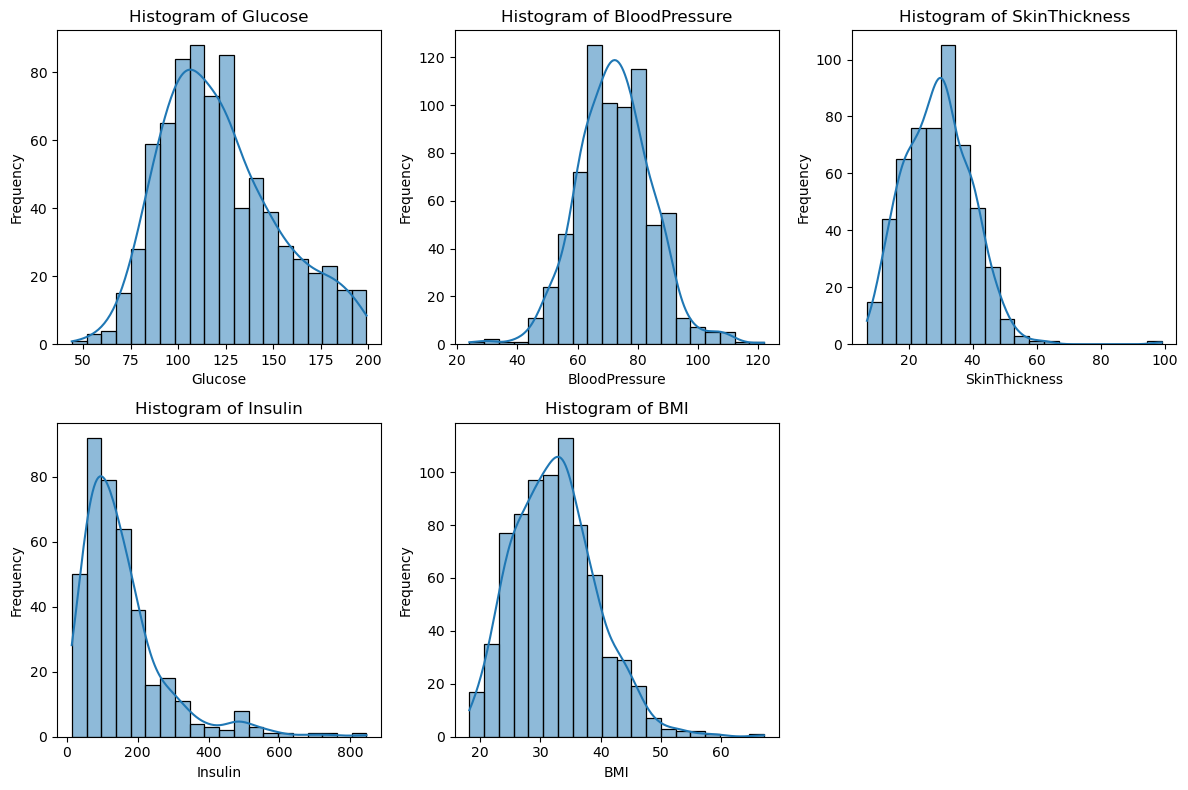

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Replace zero values with NaN in specified columns
columns_with_missing_values = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[columns_with_missing_values] = data[columns_with_missing_values].replace(0, np.nan)

# Plot histograms for the specified variables
plt.figure(figsize=(12, 8))
for i, column in enumerate(columns_with_missing_values, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[column], bins=20, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

The histograms for the variables Glucose, BloodPressure, SkinThickness, Insulin, and BMI have been plotted. Here are some observations:

* Glucose: The distribution is approximately normal, but there are some missing values.
* BloodPressure: The distribution is also approximately normal, with some missing values.
* SkinThickness: The distribution is skewed, with a significant number of missing values.
* Insulin: The distribution is highly skewed, with many missing values.
* BMI: The distribution is approximately normal, with some missing values.

Next, I will create a count plot to describe the data types and the count of variables.

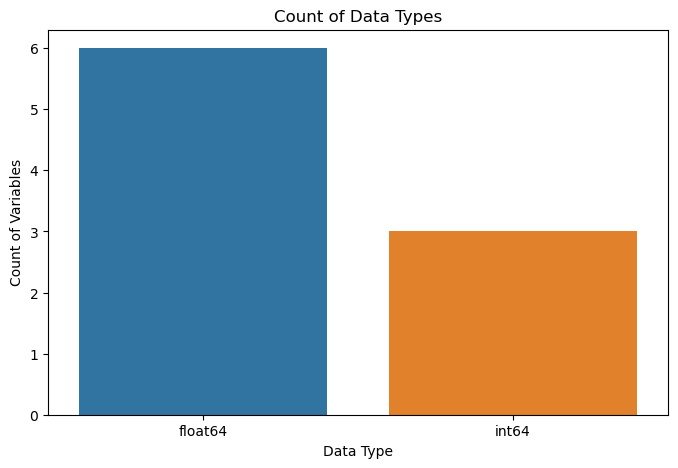

In [3]:
# Create a count plot for data types
data_types = data.dtypes.value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=data_types.index.astype(str), y=data_types.values)
plt.title('Count of Data Types')
plt.xlabel('Data Type')
plt.ylabel('Count of Variables')
plt.show()

The count plot shows that the dataset contains:

* 6 variables of type float64.
* 3 variables of type int64.

Next, I will check the balance of the data by plotting the count of outcomes and describe the findings. 

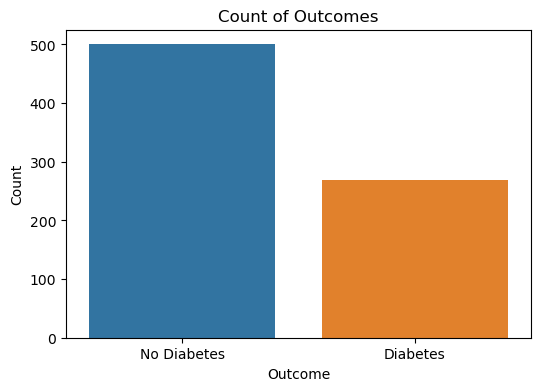

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

In [4]:
# Plot the count of outcomes to check the balance of the data
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=data)
plt.title('Count of Outcomes')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.show()

# Calculate the balance of the data
outcome_counts = data['Outcome'].value_counts(normalize=True)
outcome_counts

The count plot of outcomes shows that the dataset is imbalanced:

* Approximately 65% of the patients do not have diabetes (Outcome = 0).
* Approximately 35% of the patients have diabetes (Outcome = 1).

This imbalance suggests that special care may be needed when building predictive models, such as using techniques like resampling, adjusting class weights, or using specialized algorithms that handle imbalanced data.

Next, I will create scatter plots between pairs of variables to understand their relationships. Let's proceed with this step.

c:\Users\devia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


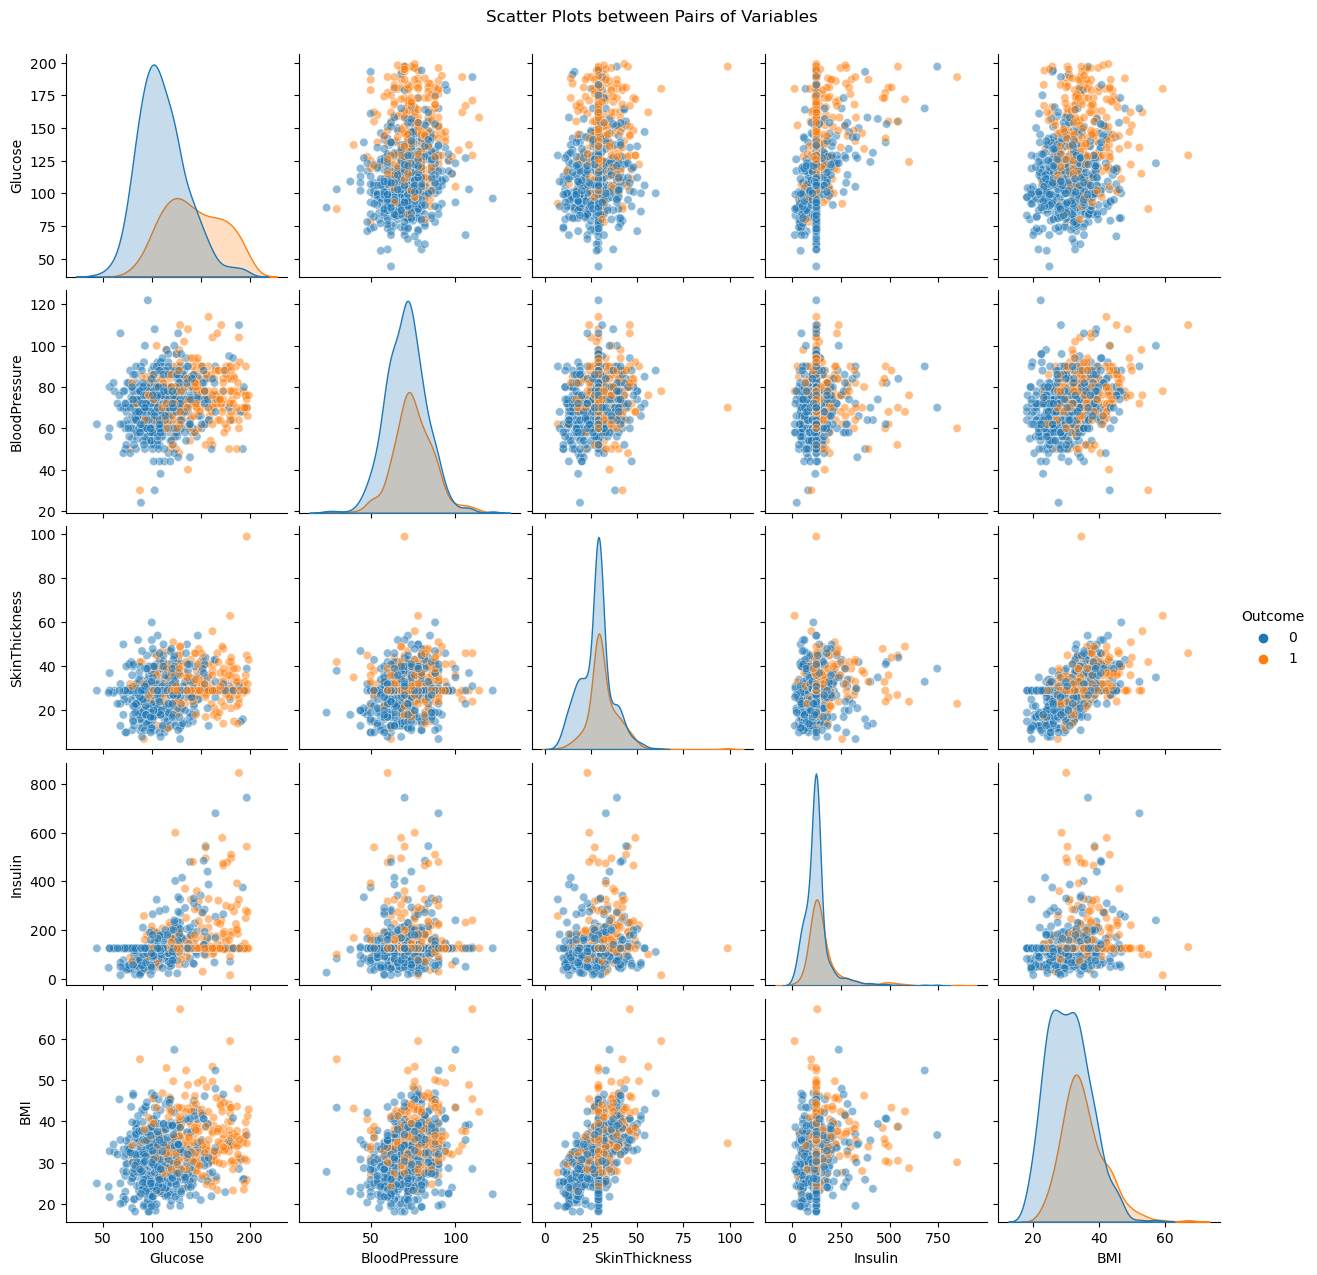

In [8]:
# Fill missing values with the median of each column
data_filled = data.fillna(data.median())

# Create scatter plots between pairs of variables
sns.pairplot(data_filled, vars=pair_columns, hue='Outcome', diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle('Scatter Plots between Pairs of Variables', y=1.02)
plt.show()

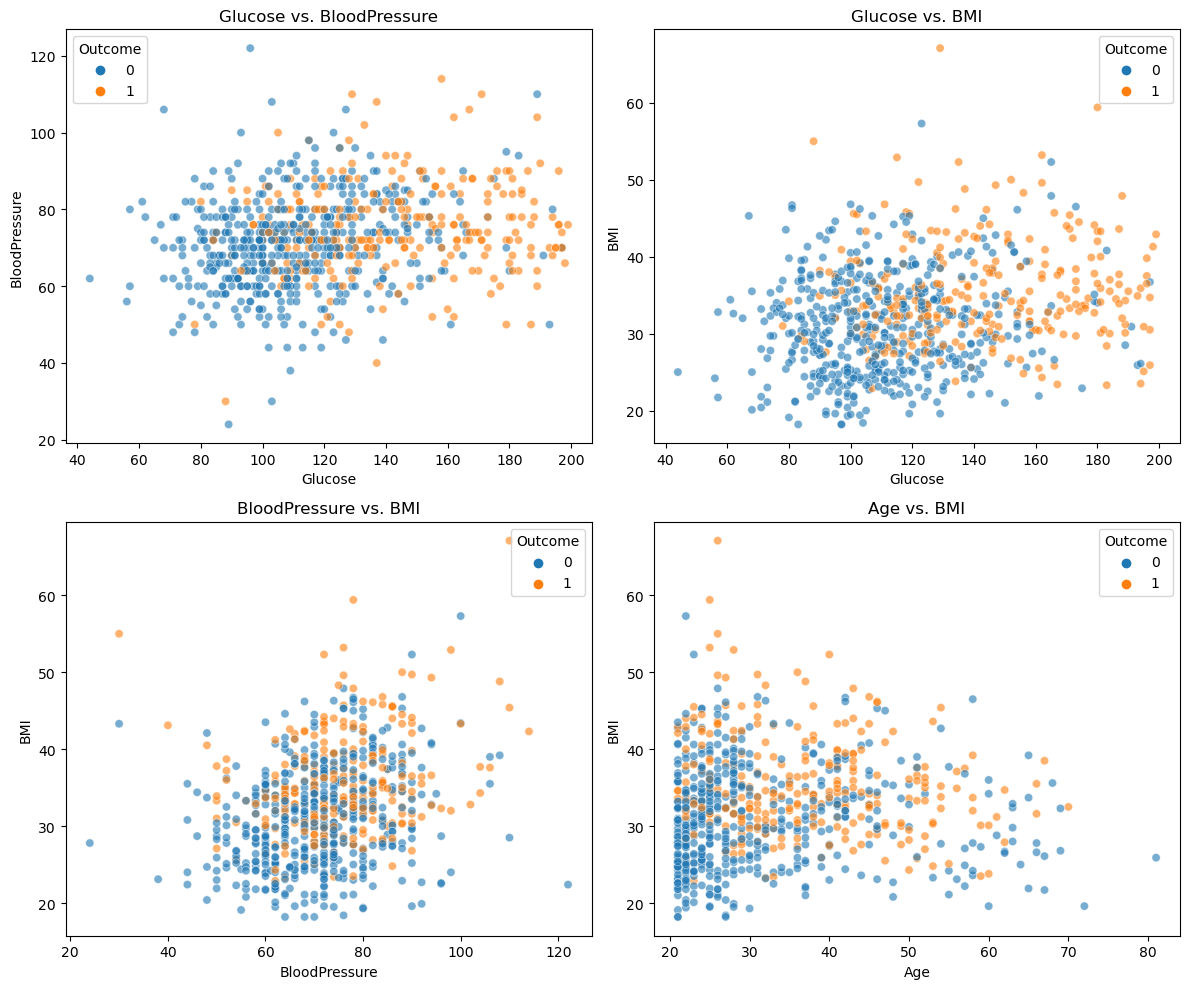

In [9]:
# Select a subset of the data with filled missing values
subset_data = data_filled[['Glucose', 'BloodPressure', 'BMI', 'Age', 'Outcome']]

# Create scatter plots for selected pairs of variables
plt.figure(figsize=(12, 10))

# Glucose vs. BloodPressure
plt.subplot(2, 2, 1)
sns.scatterplot(x='Glucose', y='BloodPressure', hue='Outcome', data=subset_data, alpha=0.6)
plt.title('Glucose vs. BloodPressure')

# Glucose vs. BMI
plt.subplot(2, 2, 2)
sns.scatterplot(x='Glucose', y='BMI', hue='Outcome', data=subset_data, alpha=0.6)
plt.title('Glucose vs. BMI')

# BloodPressure vs. BMI
plt.subplot(2, 2, 3)
sns.scatterplot(x='BloodPressure', y='BMI', hue='Outcome', data=subset_data, alpha=0.6)
plt.title('BloodPressure vs. BMI')

# Age vs. BMI
plt.subplot(2, 2, 4)
sns.scatterplot(x='Age', y='BMI', hue='Outcome', data=subset_data, alpha=0.6)
plt.title('Age vs. BMI')

plt.tight_layout()
plt.show()

The scatter plots between selected pairs of variables have been successfully generated. Here are some observations:

* Glucose vs. BloodPressure: There is a slight positive correlation, with higher glucose levels often associated with higher blood pressure. Patients with diabetes (Outcome = 1) tend to have higher glucose levels.

* Glucose vs. BMI: There is a noticeable positive correlation, with higher glucose levels often associated with higher BMI. Patients with diabetes tend to have higher glucose and BMI values.

* BloodPressure vs. BMI: There is a weak positive correlation between blood pressure and BMI. The distribution is more spread out for patients with diabetes.

* Age vs. BMI: There is no clear correlation between age and BMI. The distribution is quite spread out for both outcomes.

Next, I will perform correlation analysis and visualize it using a heat map.

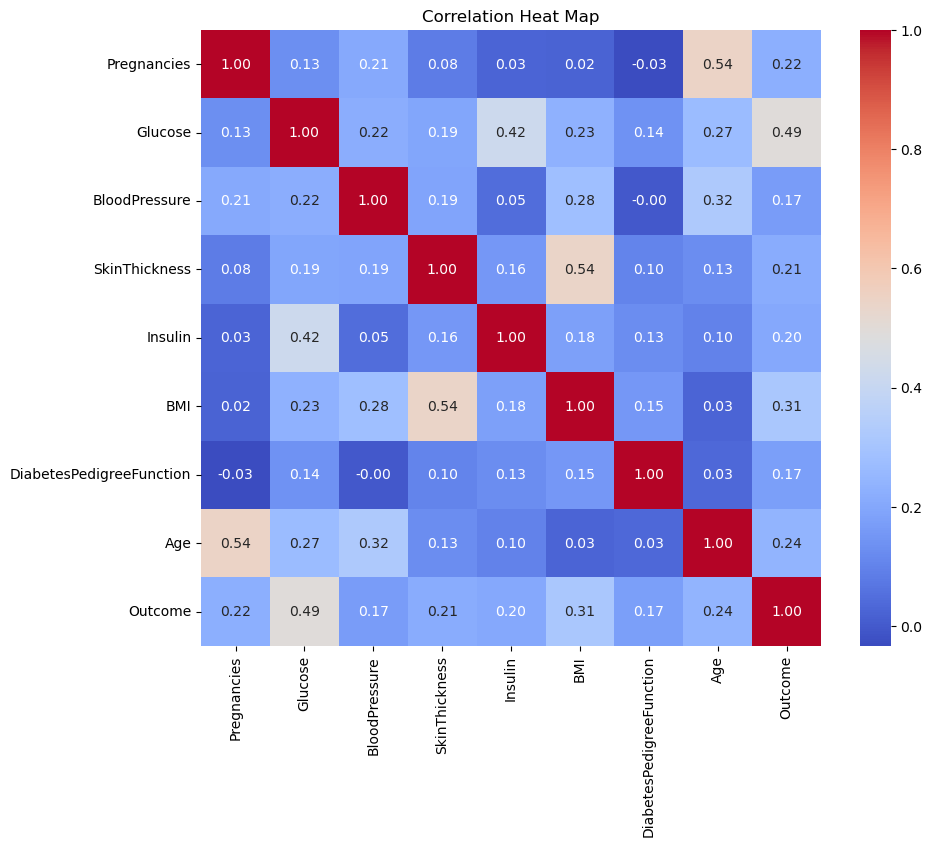

In [10]:
# Perform correlation analysis
correlation_matrix = data_filled.corr()

# Plot the heat map of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heat Map')
plt.show()